# teste T para uma amostra de um colégio

In [1]:
import numpy as np
import pandas as pd

In [2]:
#dataset São Paulo
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos UDEMY/Curso Estatistica com Python/arquivos1/enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [3]:
#escolha de 1 colégio
colegioY = enem_sp.loc[enem_sp['CO_ESCOLA'] == 35151506.0]

In [4]:
#datanho em linhas e colunas
colegioY.shape

(30, 28)

In [5]:
#data
colegioY.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
492,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35151506.0,...,64.0,Inglês,1.0,160.0,160.0,140.0,140.0,120.0,720.0,Sim
7910,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35151506.0,...,699.5,Inglês,1.0,160.0,120.0,160.0,160.0,140.0,740.0,Sim
14367,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,780.2,Inglês,1.0,120.0,120.0,100.0,140.0,160.0,640.0,Sim
22519,"1,90E+11",São Paulo,17,F,1,preta,1,2,privada,35151506.0,...,732.2,Inglês,1.0,140.0,120.0,140.0,180.0,120.0,700.0,Sim
58184,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35151506.0,...,756.3,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


Analisar a classificação das variáveis

In [6]:
colegioY.dtypes

,0
NU_INSCRICAO,object
NO_MUNICIPIO_RESIDENCIA,object
IDADE,int64
SEXO,object
TP_ESTADO_CIVIL,int64
RACA,object
TP_NACIONALIDADE,int64
TP_ST_CONCLUSAO,int64
ESCOLA,object
CO_ESCOLA,float64


Analisar valores missing (se há valores faltantes)

In [8]:
#não há vaalores faltantes nas variáveis, como podemos constatar só há 0
colegioY.isnull().sum()

,0
NU_INSCRICAO,0
NO_MUNICIPIO_RESIDENCIA,0
IDADE,0
SEXO,0
TP_ESTADO_CIVIL,0
RACA,0
TP_NACIONALIDADE,0
TP_ST_CONCLUSAO,0
ESCOLA,0
CO_ESCOLA,0


Analisar outliers

In [9]:
import plotly.express as px

In [10]:
#percebemos que só há apenas um valor Outlier que optamos por deixar e fazer parte
grafico = px.box(colegioY, y="NOTA_REDACAO")
grafico.show()

Analisar Normalidade

<Axes: xlabel='NOTA_REDACAO', ylabel='Probability'>

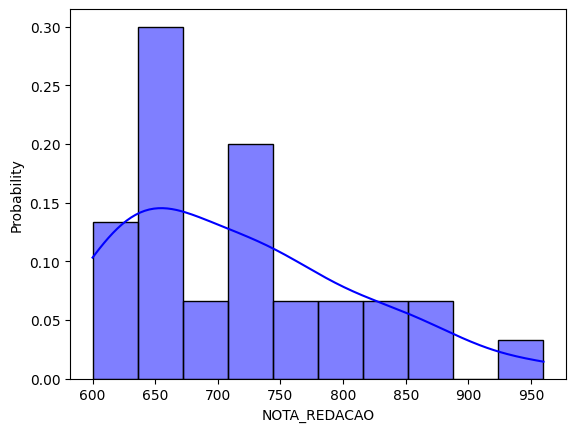

In [12]:
import seaborn as sns
sns.histplot(colegioY, x='NOTA_REDACAO', bins=10, color='blue', kde=True, stat='probability')

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt

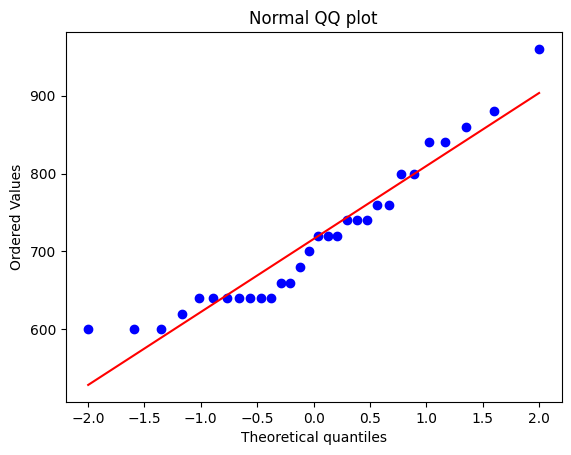

In [14]:
stats.probplot(colegioY['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title('Normal QQ plot')
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [15]:
#Teste Shapiro-wilk
stats.shapiro(colegioY['NOTA_REDACAO'])

ShapiroResult(statistic=np.float64(0.9185916932947775), pvalue=np.float64(0.024660758263151155))

In [16]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [19]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegioY['NOTA_REDACAO'], dist='norm')

(np.float64(0.15794211976028916), np.float64(0.052842042822119004))

In [20]:
# Teste Anderson-Darling
stats.anderson(colegioY['NOTA_REDACAO'], 'norm')

AndersonResult(statistic=np.float64(0.8227980663381267), critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(716.0), scale=np.float64(93.86711076174988))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

# TESTE t

Média das notas do colégio Y, comparada a média do Estado de São Paulo.

Ho = média é igual a de São Paulo : p > 0.05

Ha = média é diferente da de São Paulo : p <= 0.05

In [21]:
enem_sp['NOTA_REDACAO'].describe()

,NOTA_REDACAO
count,499940.000000
mean,593.018322
std,170.536724
min,0.000000
25%,500.000000
50%,600.000000
75%,680.000000
max,1000.000000


In [ ]:
import scipy.stats as stats

In [22]:
stats, p = stats.ttest_1samp(colegioY['NOTA_REDACAO'], popmean=593.018)
print('Estatistica de teste: {}'.format(stats.round(2)))
print('P valor: {}'.format(p.round(10)))

Estatistica de teste: 7.18
P valor: 6.72e-08


In [23]:
colegioY['NOTA_REDACAO'].describe()

,NOTA_REDACAO
count,30.000000
mean,716.000000
std,93.867111
min,600.000000
25%,640.000000
50%,710.000000
75%,760.000000
max,960.000000


# INTERPRETAÇÃO:

Teste estatístico: t = 7,18

p_valor = 6.72e-08

Conclusão: Estatisticamente, a média de redação do colégio y é diferente da média do Estado de São Paulo, com intervalo de confiança de 95%.